In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np

df = pd.read_csv("../change-detection/results.csv")
df

,algorithm,detections,false-alarms,attack1-detected,attack1-delay,attack2-detected,attack2-delay,attack3-detected,attack3-delay,attack4-detected,attack4-delay,attack5-detected,attack5-delay,attack6-detected,attack6-delay
0,kdq-tree,1,6,0,0.0,0,0.0,0,0.0,0,0.0,1,63.0,0,0.0
1,pca-cd,4,11,0,0.0,1,140.0,1,25.0,1,196.0,0,0.0,1,422.0
2,ks-win,11,56,1,23.0,1,49.0,1,132.0,1,19.0,0,0.0,1,29.0
3,one-class-svm,177,603,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,585.0


In [25]:
df_attacks = df[["algorithm", "attack1-detected", "attack2-detected", "attack3-detected", "attack4-detected", "attack5-detected", "attack6-detected"]]
df['attacks-detected'] = df_attacks[list(df_attacks.columns[1:])].sum(axis=1)

df_delays = df[["algorithm", "attack1-delay", "attack2-delay", "attack3-delay", "attack4-delay", "attack5-delay", "attack6-delay"]]
df_delays['delay-sum'] = df_delays[list(df_delays.columns[1:])].sum(axis=1)
df['average-delay'] = df_delays['delay-sum'] / df['attacks-detected']

df

/tmp/ipykernel_45731/4034465691.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delays['delay-sum'] = df_delays[list(df_delays.columns[1:])].sum(axis=1)


,algorithm,detections,false-alarms,attack1-detected,attack1-delay,attack2-detected,attack2-delay,attack3-detected,attack3-delay,attack4-detected,attack4-delay,attack5-detected,attack5-delay,attack6-detected,attack6-delay,attacks-detected,average-delay
0,kdq-tree,1,6,0,0.0,0,0.0,0,0.0,0,0.0,1,63.0,0,0.0,1,63.00
1,pca-cd,4,11,0,0.0,1,140.0,1,25.0,1,196.0,0,0.0,1,422.0,4,195.75
2,ks-win,11,56,1,23.0,1,49.0,1,132.0,1,19.0,0,0.0,1,29.0,5,50.40
3,one-class-svm,177,603,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,585.0,1,585.00


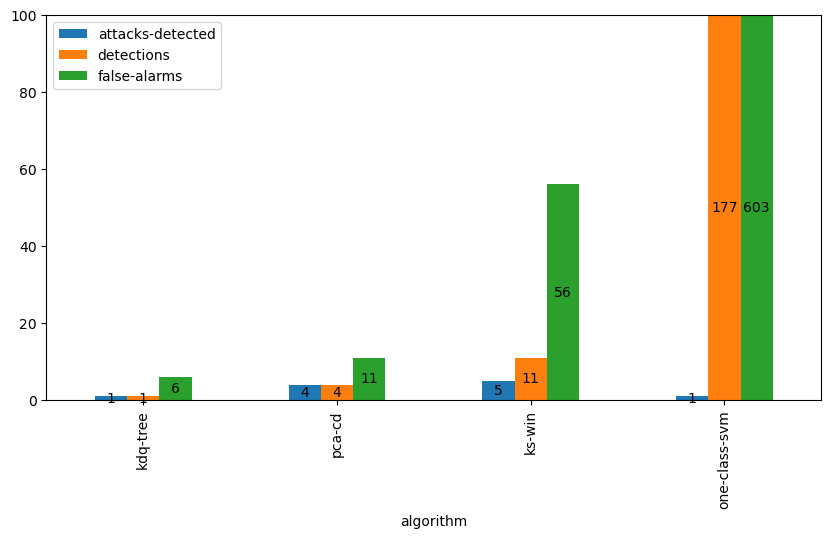

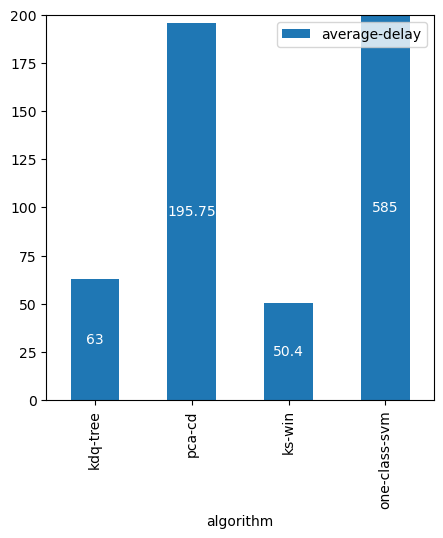

In [66]:
#plt.subplot(1, 2, 1)
ax = df.plot(x = "algorithm", y = ["attacks-detected", "detections", "false-alarms"], kind = "bar", ylim = (0,100), figsize=(10,5))
for container in ax.containers:
    labels = ax.bar_label(container, label_type = "center")
    #for l in labels:
    #    l.set_color('black')
plt.show()

#plt.subplot(1, 2, 2)
ax = df.plot(x = "algorithm", y = "average-delay", kind = "bar", ylim = (0,200), figsize=(5,5))
for container in ax.containers:
    labels = ax.bar_label(container, label_type = "center")
    for l in labels:
        l.set_color('white')
        
#plt.tight_layout()
plt.show()